In [28]:
import cv2 as cv
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [29]:
with rasterio.open("input_image.tif") as img:
    channels = img.read()

In [30]:
def get_mask(frame):
    normalized_channel = cv.normalize(
        frame, None, 0, 255, cv.NORM_MINMAX
    ).astype(np.uint8)

    # Convert to a 3-channel image
    hsv = cv.cvtColor(normalized_channel, cv.COLOR_GRAY2BGR)
    hsv = cv.cvtColor(hsv, cv.COLOR_BGR2HSV)

    # define range of black color in HSV
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 30])

    # Threshold the HSV image to get only black colors
    mask = cv.inRange(hsv, lower_black, upper_black)

    # Bitwise-AND mask and original image
    return cv.bitwise_and(normalized_channel, normalized_channel, mask=mask)


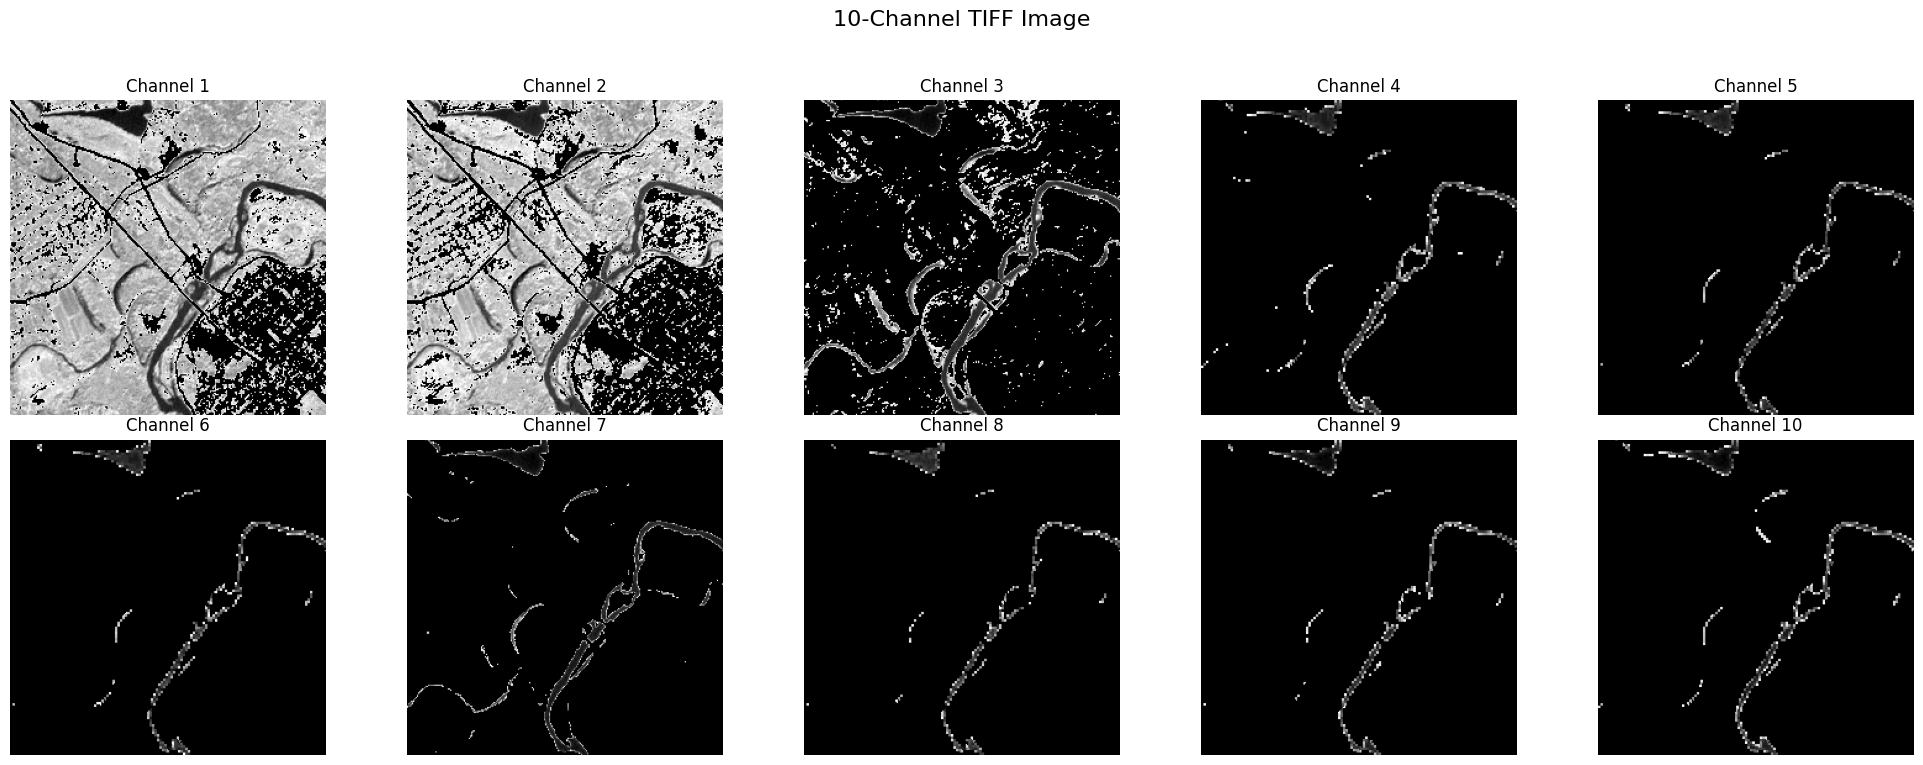

In [31]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("10-Channel TIFF Image", fontsize=16)

for i in range(10):
    row, col = divmod(i, 5)
    ax = axes[row, col]
    ax.imshow(get_mask(channels[i]), cmap="gray")
    ax.set_title(f"Channel {i + 1}")
    ax.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
